In [34]:
 import pandas as pd
 import numpy as np
 from sklearn.feature_extraction.text import CountVectorizer
 from sklearn.model_selection import train_test_split
 from sklearn.tree import DecisionTreeClassifier



In [35]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91750\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string

# Initialize the stemmer
stemmer = SnowballStemmer("english")

# Download stopwords if needed
nltk.download('stopwords')

# Define stopwords set
stopword = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91750\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
 import re
 import nltk
 from nltk.util import pr
 stemmer = nltk.SnowballStemmer("english")
 from nltk.corpus import stopwords
 import string
 stopword = set(stopwords.words("english"))

In [38]:
df = pd.read_csv("C:\\Users\\91750\\Desktop\\Infosys_Hate_Speech_Detection\\twitter.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [39]:
import pandas as pd
df = pd.read_csv("C:\\Users\\91750\\Desktop\\Infosys_Hate_Speech_Detection\\twitter.csv") 
df['labels'] = df['class'].map({0: "Hate Speech Detected", 1: "Offensive language detected", 3: "No hate and offensive speech"})
print(df.head())


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                        labels  
0                          NaN  
1  Offensive language detected  
2  Offensive language detected  
3  Offensive language detected  
4  Offensive language detected  


In [40]:
df = df[['tweet', 'labels']]  # Assuming 'text' is the column for tweets
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,NaN
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language detected


In [41]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+/www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df ["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                        labels  
0                          NaN  
1  Offensive language detected  
2  Offensive language detected  
3  Offensive language detected  
4  Offensive language detected  


In [42]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\91750\\Desktop\\Infosys_Hate_Speech_Detection\\twitter.csv")

# Assuming the label column in your dataset is named 'label' and it uses the following encoding:
# 0: "Hate Speech Detected", 1: "Offensive Language Detected", 2: "No Hate and Offensive Speech"

# Replace with descriptive labels for better visualization
label_mapping = {0: "Hate Speech Detected", 1: "Offensive Language Detected", 2: "No Hate and Offensive Speech"}
df['class'] = df['class'].map(label_mapping)

# Count the occurrences of each label
label_counts = df['class'].value_counts()
label_percentages = label_counts / label_counts.sum() * 100

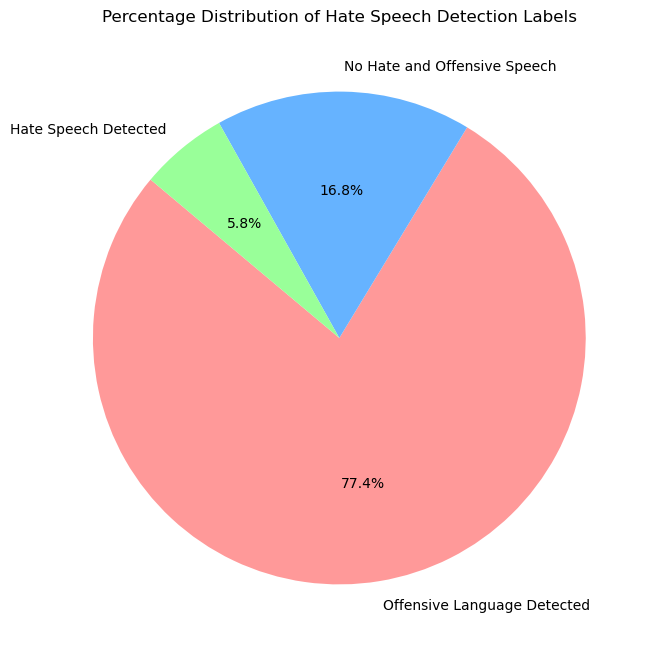

In [43]:
# Plot a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(label_percentages, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Percentage Distribution of Hate Speech Detection Labels")
plt.show()

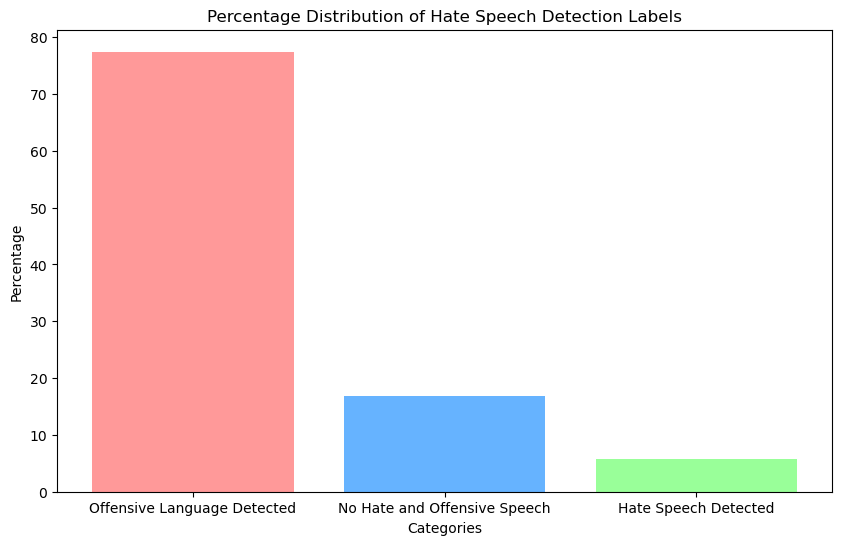

In [44]:
# Plot a Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_percentages, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.xlabel("Categories")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Hate Speech Detection Labels")
plt.show()

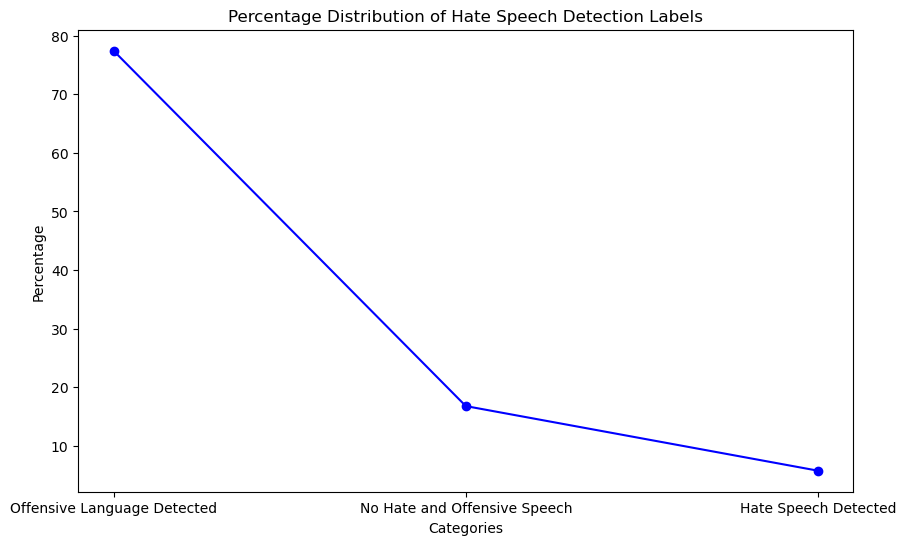

In [45]:
# Plot a Line Chart
plt.figure(figsize=(10, 6))
plt.plot(label_counts.index, label_percentages, marker='o', linestyle='-', color='b')
plt.xlabel("Categories")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Hate Speech Detection Labels")
plt.show()

In [46]:
# Preprocessing the Dataset
def preprocess_text(text):
    # Define stop_words and stemmer inside the function to ensure accessibility
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer("english")
    
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Tokenize and lowercase
    tokens = text.lower().split()
    
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing to the 'tweet' column
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)


In [47]:
# Map Labels for Classification
label_mapping = {0: "Hate Speech Detected", 1: "Offensive Language Detected", 2: "No Hate and Offensive Speech"}
df['class_label'] = df['class']  # Keep the numeric class for modeling
df['class'] = df['class'].map(label_mapping)


In [48]:
# Splitting the Data
X = df['cleaned_tweet']
y = df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
# Text Vectorization
vectorizer = CountVectorizer(max_features=5000)  # Limit features for performance
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [50]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [51]:
# Model Training using Logistic Regression
model = LogisticRegression()
model.fit(X_train_vect, y_train)

C:\Users\91750\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# Model Evaluation
y_pred = model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 89.75%


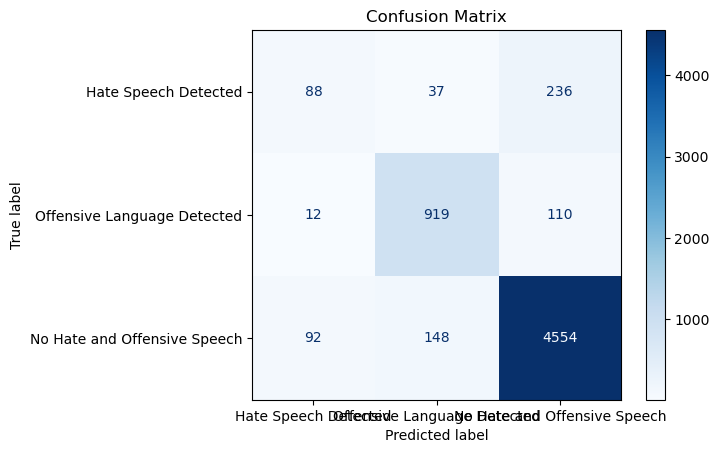

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.values())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [54]:
def predict_label(text):
    # Preprocess the text
    processed_text = preprocess_text(text)
    # Vectorize the text
    vectorized_text = vectorizer.transform([processed_text])
    # Predict the label
    prediction = model.predict(vectorized_text)
    return prediction[0]

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Random Forest Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Prediction and Evaluation
rf_y_pred = rf_model.predict(X_test_vect)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Accuracy: 89.49%


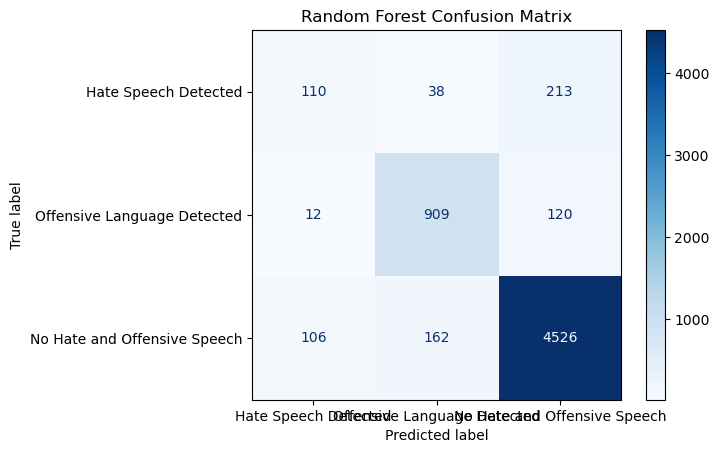

In [59]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=label_mapping.values())
rf_disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model Training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_vect, y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
# Prediction and Evaluation
dt_y_pred = dt_model.predict(X_test_vect)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

Decision Tree Accuracy: 86.44%


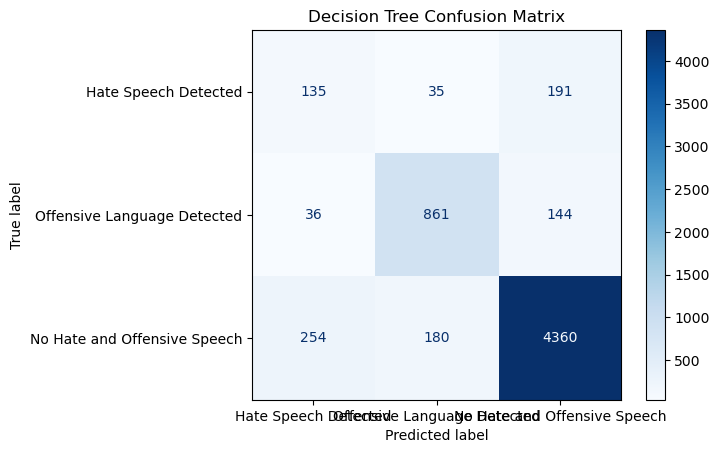

In [67]:
# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=label_mapping.values())
dt_disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model Training
knn_model = KNeighborsClassifier(n_neighbors=5)  # Choose `k` based on tuning
knn_model.fit(X_train_vect, y_train)

KNeighborsClassifier()

In [69]:
# Prediction and Evaluation
knn_y_pred = knn_model.predict(X_test_vect)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")

K-Nearest Neighbors Accuracy: 85.72%


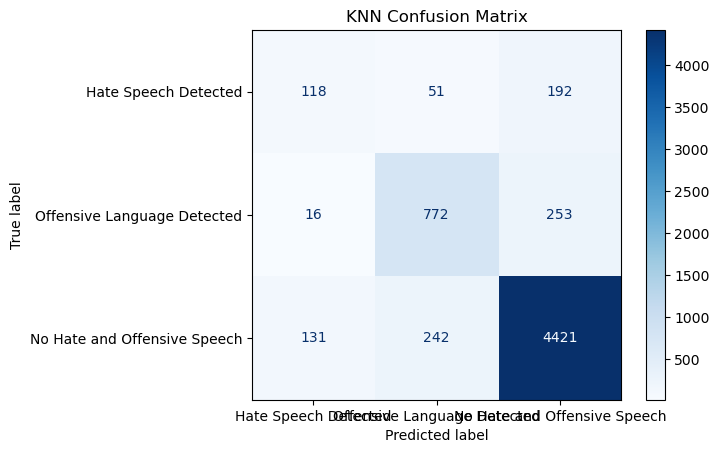

In [70]:
# Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=label_mapping.values())
knn_disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()

In [64]:
from sklearn.svm import SVC

# SVM Model Training
svm_model = SVC(kernel='linear', random_state=42)  # Use 'linear' kernel for text classification
svm_model.fit(X_train_vect, y_train)

SVC(kernel='linear', random_state=42)

In [65]:
# Prediction and Evaluation
svm_y_pred = svm_model.predict(X_test_vect)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%")

Support Vector Machine Accuracy: 88.83%


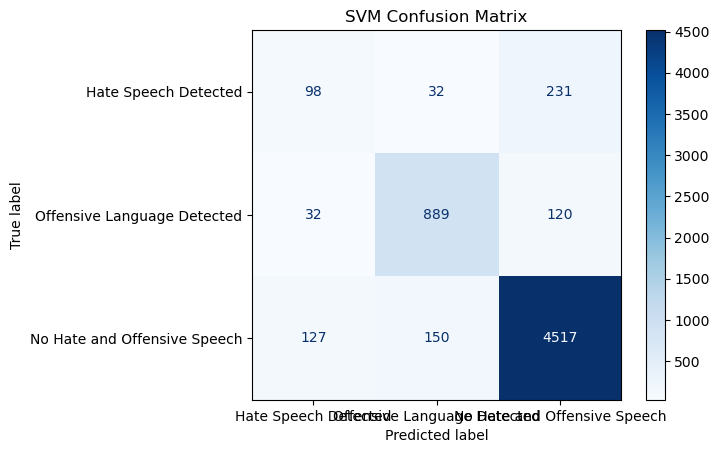

In [71]:
# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=label_mapping.values())
svm_disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

In [72]:
# Predictions
train_pred = model.predict(X_train_vect)
test_pred = model.predict(X_test_vect)

# Calculate Training and Testing Accuracy
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Logistic Regression Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Logistic Regression Testing Accuracy: {test_accuracy * 100:.2f}%")

Logistic Regression Training Accuracy: 95.59%
Logistic Regression Testing Accuracy: 89.75%


In [73]:
# Predictions
rf_train_pred = rf_model.predict(X_train_vect)
rf_test_pred = rf_model.predict(X_test_vect)

# Calculate Training and Testing Accuracy
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

print(f"Random Forest Training Accuracy: {rf_train_accuracy * 100:.2f}%")
print(f"Random Forest Testing Accuracy: {rf_test_accuracy * 100:.2f}%")


Random Forest Training Accuracy: 99.74%
Random Forest Testing Accuracy: 89.49%


In [74]:
# Predictions
dt_train_pred = dt_model.predict(X_train_vect)
dt_test_pred = dt_model.predict(X_test_vect)

# Calculate Training and Testing Accuracy
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)

print(f"Decision Tree Training Accuracy: {dt_train_accuracy * 100:.2f}%")
print(f"Decision Tree Testing Accuracy: {dt_test_accuracy * 100:.2f}%")

Decision Tree Training Accuracy: 99.74%
Decision Tree Testing Accuracy: 86.44%


In [77]:
# Predictions
knn_train_pred = knn_model.predict(X_train_vect)
knn_test_pred = knn_model.predict(X_test_vect)

# Calculate Training and Testing Accuracy
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

print(f"KNN Training Accuracy: {knn_train_accuracy * 100:.2f}%")
print(f"KNN Testing Accuracy: {knn_test_accuracy * 100:.2f}%")


KNN Training Accuracy: 89.59%
KNN Testing Accuracy: 85.72%


In [81]:
# Predictions
svm_train_pred = svm_model.predict(X_train_vect)
svm_test_pred = svm_model.predict(X_test_vect)

# Calculate Training and Testing Accuracy
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)

print(f"SVM Training Accuracy: {svm_train_accuracy * 100:.2f}%")
print(f"SVM Testing Accuracy: {svm_test_accuracy * 100:.2f}%")


SVM Training Accuracy: 96.51%
SVM Testing Accuracy: 88.83%


In [82]:
new_tweet = "I will kill you"
predicted_label = predict_label(new_tweet)
print(f"The predicted label for the tweet is: {predicted_label}")

The predicted label for the tweet is: Offensive Language Detected


In [83]:
new_tweet = "Just had a great day with friends at the park!"
predicted_label = predict_label(new_tweet)
print(f"The predicted label for the tweet is: {predicted_label}")

The predicted label for the tweet is: No Hate and Offensive Speech
